# Library 정리

In [1]:
# 사용할 Library 정리
import pandas as pd
import numpy as np

# Machin Learning
import sklearn
from sklearn.svm import SVC
from sklearn import metrics

# 데이터 가져오기

In [2]:
Train_df = pd.read_csv("train.csv")
Train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Python을 이용한 Tensor 생성
## Titanic 데이터 Tensor화

In [3]:
# 분석에 사용할 Feature만 추출한다.
변수_선택 = Train_df[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]
변수_선택

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [4]:
# 결측값 제거
결측값_제거 = 변수_선택.dropna().reset_index(drop=True)
결측값_제거

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
707,0,3,female,39.0,0,5,29.1250,Q
708,0,2,male,27.0,0,0,13.0000,S
709,1,1,female,19.0,0,0,30.0000,S
710,1,1,male,26.0,0,0,30.0000,C


## Feature Scaling

In [5]:
# 범주형 변수의 One-Hot Encoding
결측값_제거[["Pclass_1", "Pclass_2", "Pclass_3"]] = pd.get_dummies(결측값_제거["Pclass"])
결측값_제거[["Sex_female", "Sex_male"]] = pd.get_dummies(결측값_제거["Sex"])
결측값_제거[["Embarked_C", "Embarked_Q", "Embarked_S"]] = pd.get_dummies(결측값_제거["Embarked"])
결측값_제거

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,22.0,1,0,7.2500,S,0,0,1,0,1,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,1,0,0,1,0,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1,1,0,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,1,0,0,1,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,0,3,female,39.0,0,5,29.1250,Q,0,0,1,1,0,0,1,0
708,0,2,male,27.0,0,0,13.0000,S,0,1,0,0,1,0,0,1
709,1,1,female,19.0,0,0,30.0000,S,1,0,0,1,0,0,0,1
710,1,1,male,26.0,0,0,30.0000,C,1,0,0,0,1,1,0,0


In [6]:
# 연속형 변수를 표준 정규분포로 만드는 함수 생성
def Standard_Scaler(target_Series):
    """
    대상 Series를 Standard Scaler한다.
    """
    target_mean = target_Series.mean()
    target_std = target_Series.std()
    scaled = (target_Series - target_mean)/target_std
    
    return scaled

In [7]:
결측값_제거["Age_Scaled"] = Standard_Scaler(결측값_제거["Age"])
결측값_제거["SibSp_Scaled"] = Standard_Scaler(결측값_제거["SibSp"])
결측값_제거["Parch_Scaled"] = Standard_Scaler(결측값_제거["Parch"])
결측값_제거["Fare_Scaled"] = Standard_Scaler(결측값_제거["Fare"])

## 전처리된 Feature만 선택

In [8]:
Feature_Scaling = 결측값_제거[
    ["Survived", "Pclass_1", "Pclass_2", "Pclass_3", "Sex_female",
     "Sex_male", "Embarked_C", "Embarked_Q", "Embarked_S", "Age_Scaled",
     "SibSp_Scaled", "Parch_Scaled", "Fare_Scaled"]
]
Feature_Scaling

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_Scaled,SibSp_Scaled,Parch_Scaled,Fare_Scaled
0,0,0,0,1,0,1,0,0,1,-0.527298,0.522144,-0.506431,-0.516017
1,1,1,0,0,1,0,1,0,0,0.576688,0.522144,-0.506431,0.693558
2,1,0,0,1,1,0,0,0,1,-0.251301,-0.552325,-0.506431,-0.503267
3,1,1,0,0,1,0,0,0,1,0.369691,0.522144,-0.506431,0.350080
4,0,0,0,1,0,1,0,0,1,0.369691,-0.552325,-0.506431,-0.500905
...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,0,0,0,1,1,0,0,1,0,0.645688,-0.552325,5.347126,-0.102803
708,0,0,1,0,0,1,0,0,1,-0.182302,-0.552325,-0.506431,-0.407401
709,1,1,0,0,1,0,0,0,1,-0.734295,-0.552325,-0.506431,-0.086274
710,1,1,0,0,0,1,1,0,0,-0.251301,-0.552325,-0.506431,-0.086274


## 생성된 데이터를 Array로 가지고 온다.

In [9]:
# Label을 Array로 가지고 온다.
Train_Label = Feature_Scaling["Survived"].values
Train_Label

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,

In [10]:
# Survived만 제외하고 가지고 온다.
Train_Features = Feature_Scaling[Feature_Scaling.columns.difference(["Survived"])].values
Train_Features

array([[-0.52729787,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.52214373],
       [ 0.57668847,  1.        ,  0.        , ...,  1.        ,
         0.        ,  0.52214373],
       [-0.25130129,  0.        ,  0.        , ...,  1.        ,
         0.        , -0.55232545],
       ...,
       [-0.73429531,  0.        ,  0.        , ...,  1.        ,
         0.        , -0.55232545],
       [-0.25130129,  1.        ,  0.        , ...,  0.        ,
         1.        , -0.55232545],
       [ 0.16269359,  0.        ,  1.        , ...,  0.        ,
         1.        , -0.55232545]])

## 위 과정을 test.csv에 대해서도 해주자.
* test.csv는 Survived 변수를 gender_submission.csv 파일에 입력 해놓았으므로, 이를 합쳐주는 과정을 추가하도록 하자.

In [11]:
# test.csv를 가지고 온다.
test_df = pd.read_csv("test.csv")

# test 데이터의 Label을 가지고 온다.
test_label_df = pd.read_csv("gender_submission.csv")

## 동일한 Column을 기준으로 병합

In [12]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [13]:
test_label_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


* 두 DataFrame은 PassengerId Column을 동일한 Column으로 갖는다.
* 이를 기준으로 두 DataFrame을 합쳐주자.

In [14]:
test_df = pd.merge(test_df, test_label_df, on = "PassengerId")
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


## 위에서 실시한 과정을 Test 데이터에도 동일하게 해주자.

In [15]:
# 분석에 사용할 Feature만 추출한다.
test_변수_선택 = test_df[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]

# 결측값 제거
test_결측값_제거 = test_변수_선택.dropna().reset_index(drop=True)

# 범주형 변수의 One-Hot Encoding
test_결측값_제거[["Pclass_1", "Pclass_2", "Pclass_3"]] = pd.get_dummies(test_결측값_제거["Pclass"])
test_결측값_제거[["Sex_female", "Sex_male"]] = pd.get_dummies(test_결측값_제거["Sex"])
test_결측값_제거[["Embarked_C", "Embarked_Q", "Embarked_S"]] = pd.get_dummies(test_결측값_제거["Embarked"])

# 연속형 변수의 Standard Scaler
test_결측값_제거["Age_Scaled"] = Standard_Scaler(test_결측값_제거["Age"])
test_결측값_제거["SibSp_Scaled"] = Standard_Scaler(test_결측값_제거["SibSp"])
test_결측값_제거["Parch_Scaled"] = Standard_Scaler(test_결측값_제거["Parch"])
test_결측값_제거["Fare_Scaled"] = Standard_Scaler(test_결측값_제거["Fare"])

# 변수 정리
test_Feature_Scaling = test_결측값_제거[
    ["Survived", "Pclass_1", "Pclass_2", "Pclass_3", "Sex_female",
     "Sex_male", "Embarked_C", "Embarked_Q", "Embarked_S", "Age_Scaled",
     "SibSp_Scaled", "Parch_Scaled", "Fare_Scaled"]
]

# Array로 Data를 가지고 온다.
Test_Label = test_Feature_Scaling["Survived"].values
Test_Features = test_Feature_Scaling[test_Feature_Scaling.columns.difference(["Survived"])].values

In [16]:
Test_Label

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,

In [17]:
Test_Features

array([[ 0.30619369,  0.        ,  1.        , ...,  0.        ,
         1.        , -0.55243592],
       [ 1.19243111,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.59041589],
       [ 2.25591601,  0.        ,  1.        , ...,  0.        ,
         1.        , -0.55243592],
       ...,
       [-0.15464977,  0.        ,  0.        , ...,  1.        ,
         0.        , -0.55243592],
       [ 0.62523916,  1.        ,  0.        , ...,  1.        ,
         0.        , -0.55243592],
       [ 0.58978966,  0.        ,  0.        , ...,  0.        ,
         1.        , -0.55243592]])

# SVM으로 전처리된 데이터를 학습시켜보자.

In [18]:
# 선형 SVM으로 학습
clf = SVC(kernel='linear')
clf.fit(Train_Features, Train_Label)

SVC(kernel='linear')

In [19]:
Predict_result = clf.predict(Test_Features)
Predict_result

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,

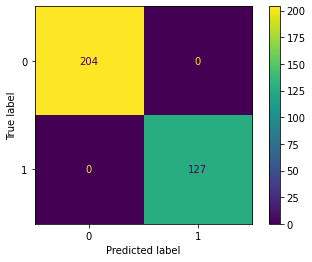

In [20]:
Confuse_mat = metrics.confusion_matrix(Test_Label, Predict_result)
metrics.ConfusionMatrixDisplay(Confuse_mat).plot()

# 코드 정리

In [21]:
# 연속형 변수를 표준 정규분포로 만드는 함수 생성
def Standard_Scaler(target_Series):
    """
    대상 Series를 Standard Scaler한다.
    """
    target_mean = target_Series.mean()
    target_std = target_Series.std()
    scaled = (target_Series - target_mean)/target_std
    
    return scaled


# Titanic Data 전처리 함수 생성
def Titanic_Data_Handler(df):

    # 분석에 사용할 Feature만 추출한다.
    변수_선택 = df[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]
    
    # 결측값 제거
    결측값_제거 = 변수_선택.dropna().reset_index(drop=True)
    
    # 범주형 변수의 One-Hot Encoding
    결측값_제거[["Pclass_1", "Pclass_2", "Pclass_3"]] = pd.get_dummies(결측값_제거["Pclass"])
    결측값_제거[["Sex_female", "Sex_male"]] = pd.get_dummies(결측값_제거["Sex"])
    결측값_제거[["Embarked_C", "Embarked_Q", "Embarked_S"]] = pd.get_dummies(결측값_제거["Embarked"])
    
    # 연속형 변수의 Standard Scaler
    결측값_제거["Age_Scaled"] = Standard_Scaler(결측값_제거["Age"])
    결측값_제거["SibSp_Scaled"] = Standard_Scaler(결측값_제거["SibSp"])
    결측값_제거["Parch_Scaled"] = Standard_Scaler(결측값_제거["Parch"])
    결측값_제거["Fare_Scaled"] = Standard_Scaler(결측값_제거["Fare"])
    
    # 변수 정리
    변수_정리 = 결측값_제거[
        ["Survived", "Pclass_1", "Pclass_2", "Pclass_3", "Sex_female",
         "Sex_male", "Embarked_C", "Embarked_Q", "Embarked_S", "Age_Scaled",
         "SibSp_Scaled", "Parch_Scaled", "Fare_Scaled"]
    ]
    
    # Tensor로 반환한다.
    Label = 변수_정리["Survived"].values
    Dataset = 변수_정리[변수_정리.columns.difference(["Survived"])].values
    
    return Dataset, Label

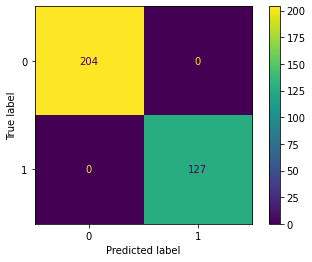

In [22]:
# Import Data
Train_df = pd.read_csv("train.csv")
test_df = pd.merge( pd.read_csv("test.csv"), pd.read_csv("gender_submission.csv"), on = "PassengerId")

# Data Handling
Train_Dataset, Train_Label = Titanic_Data_Handler(Train_df)
Test_Dataset, Test_Label = Titanic_Data_Handler(test_df)

# Machine Learning
# 선형 SVM으로 학습
clf = SVC(kernel='linear')
clf.fit(Train_Dataset, Train_Label)

# 예측 및 모델 성능 평가
Predict_result = clf.predict(Test_Dataset)
Confuse_mat = metrics.confusion_matrix(Test_Label, Predict_result)
metrics.ConfusionMatrixDisplay(Confuse_mat).plot()

<br>
<br>
<br>
<br>

# 이미지 데이터의 전처리

In [23]:
import matplotlib.pyplot as plt

## Numpy array의 원소를 지정해, 원하는 색을 출력시켜보자.

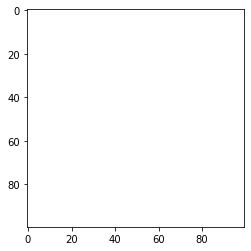

In [24]:
# 모든 Channel이 255로 이루어진 경우.
# 지정된 값으로 이루어진 Array
R_matrix = np.full((100, 100, 1), 255)
G_matrix = np.full((100, 100, 1), 255)
B_matrix = np.full((100, 100, 1), 255)

# 위 Array를 3개의 Channel로 구성한 Image
img = np.concatenate((R_matrix, G_matrix, B_matrix), axis=2)

# 위 img를 시각화한다.
plt.imshow(img)
plt.show()

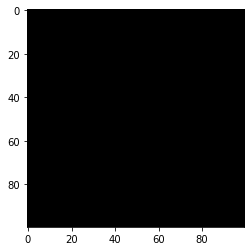

In [25]:
# 모든 Channel이 0으로 이루어진 경우.
# 지정된 값으로 이루어진 Array
R_matrix = np.full((100, 100, 1), 0)
G_matrix = np.full((100, 100, 1), 0)
B_matrix = np.full((100, 100, 1), 0)

# 위 Array를 3개의 Channel로 구성한 Image
img = np.concatenate((R_matrix, G_matrix, B_matrix), axis=2)

# 위 img를 시각화한다.
plt.imshow(img)
plt.show()

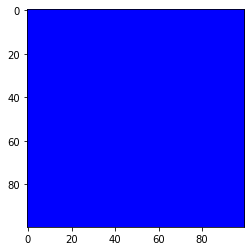

In [26]:
# B Channel만 255로 하고, 나머지 Channel은 영행렬로 생성
# 지정된 값으로 이루어진 Array
R_matrix = np.full((100, 100, 1), 0)
G_matrix = np.full((100, 100, 1), 0)
B_matrix = np.full((100, 100, 1), 255)

# 위 Array를 3개의 Channel로 구성한 Image
img = np.concatenate((R_matrix, G_matrix, B_matrix), axis=2)

# 위 img를 시각화한다.
plt.imshow(img)
plt.show()

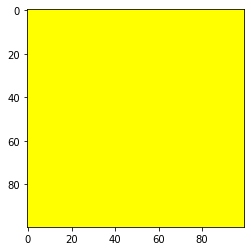

In [27]:
# B Channel만 0으로 하고, 나머지 Channel은 255의 원소를 갖는 행렬로 지정
# 지정된 값으로 이루어진 Array
R_matrix = np.full((100, 100, 1), 255)
G_matrix = np.full((100, 100, 1), 255)
B_matrix = np.full((100, 100, 1), 0)

# 위 Array를 3개의 Channel로 구성한 Image
img = np.concatenate((R_matrix, G_matrix, B_matrix), axis=2)

# 위 img를 시각화한다.
plt.imshow(img)
plt.show()

# 이미지를 Python으로 불러와보자.

In [28]:
from PIL import Image

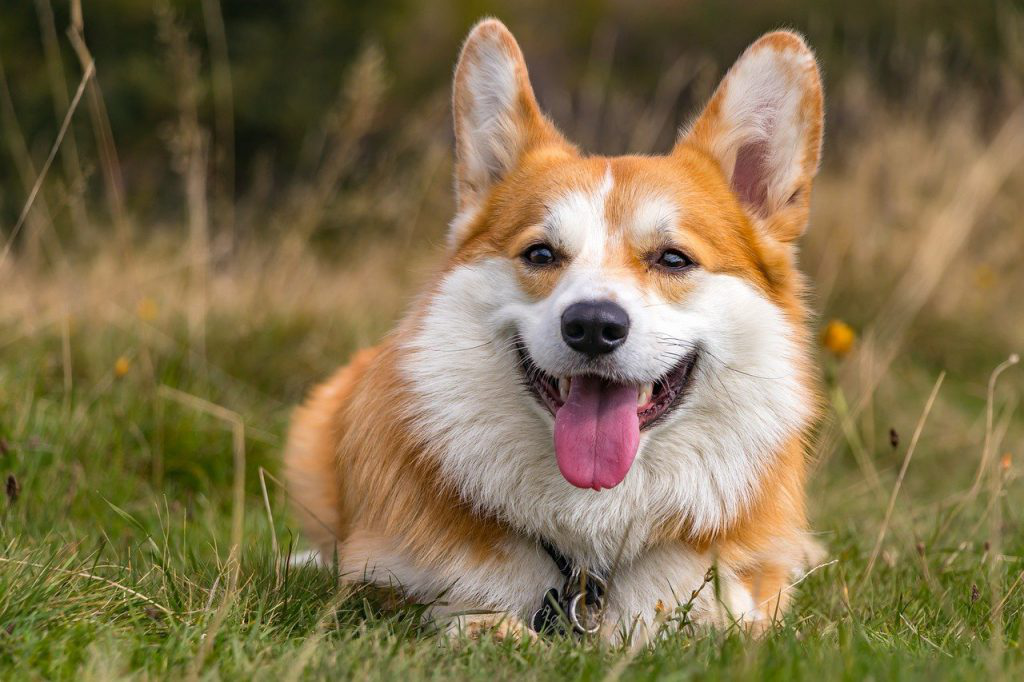

In [29]:
강아지 = Image.open("강아지사진.jpg")
강아지

In [30]:
강아지_array = np.array(강아지)
강아지_array

array([[[ 32,  35,  18],
        [ 32,  35,  18],
        [ 31,  35,  18],
        ...,
        [ 51,  50,  22],
        [ 52,  52,  24],
        [ 54,  54,  26]],

       [[ 32,  35,  18],
        [ 32,  35,  18],
        [ 31,  35,  18],
        ...,
        [ 49,  49,  21],
        [ 51,  51,  23],
        [ 53,  53,  25]],

       [[ 32,  35,  18],
        [ 32,  35,  18],
        [ 31,  35,  18],
        ...,
        [ 49,  49,  21],
        [ 50,  50,  22],
        [ 51,  51,  23]],

       ...,

       [[115, 123,  48],
        [106, 114,  37],
        [ 97, 106,  27],
        ...,
        [124, 120,  59],
        [129, 123,  63],
        [132, 126,  66]],

       [[131, 139,  64],
        [111, 119,  42],
        [110, 117,  39],
        ...,
        [125, 121,  60],
        [127, 121,  61],
        [128, 122,  62]],

       [[135, 141,  67],
        [115, 122,  45],
        [113, 120,  42],
        ...,
        [125, 121,  60],
        [127, 121,  61],
        [128, 122,  62]]

In [31]:
# 강아지 Array의 형태
강아지_array.shape

(682, 1024, 3)

In [32]:
# 강아지 Array의 최솟값
강아지_array.min()

0

In [33]:
# 강아지 Array의 최댓값
강아지_array.max()

255

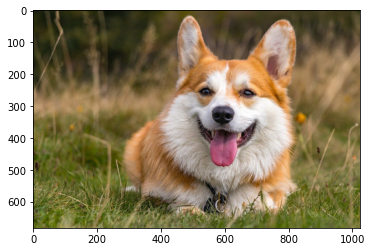

In [34]:
# Array를 이미지로 표현
plt.imshow(강아지_array)
plt.show()

## 특정 Channel만 값이 있게 해서 출력해보자.

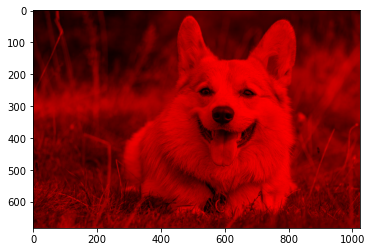

In [35]:
# 강아지 이미지의 R 채널만 원본 값을 갖게하고,
# 나머지 채널은 0을 갖게 하자.
강아지_R = np.expand_dims(강아지_array[:,:,0], axis=2)
강아지_shape = 강아지_R.shape

Array_G = np.full(강아지_shape, 0)
Array_B = np.full(강아지_shape, 0)

One_Channel_img = np.concatenate(
    (강아지_R, Array_G, Array_B),
     axis=2
)

# 시각화
plt.imshow(One_Channel_img)

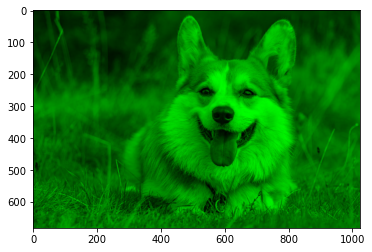

In [36]:
# 강아지 이미지의 G 채널만 원본 값을 갖게하고,
# 나머지 채널은 0을 갖게 하자.
강아지_G = np.expand_dims(강아지_array[:,:,1], axis=2)
강아지_shape = 강아지_G.shape

Array_R = np.full(강아지_shape, 0)
Array_B = np.full(강아지_shape, 0)

One_Channel_img = np.concatenate(
    (Array_R, 강아지_G, Array_B),
     axis=2
)

# 시각화
plt.imshow(One_Channel_img)

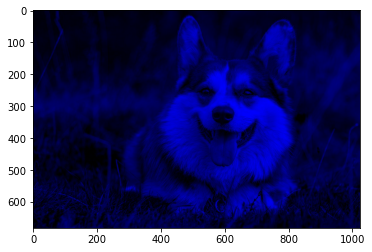

In [37]:
# 강아지 이미지의 B 채널만 원본 값을 갖게하고,
# 나머지 채널은 0을 갖게 하자.
강아지_B = np.expand_dims(강아지_array[:,:,2], axis=2)
강아지_shape = 강아지_G.shape

Array_R = np.full(강아지_shape, 0)
Array_G = np.full(강아지_shape, 0)

One_Channel_img = np.concatenate(
    (Array_R, Array_G, 강아지_B),
     axis=2
)

# 시각화
plt.imshow(One_Channel_img)

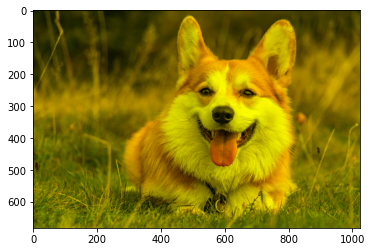

In [38]:
# 강아지 이미지의 R, G 채널만 원본 값을 갖게하고,
# B 채널은 0을 갖게 하자.
강아지_RG = 강아지_array[:,:,0:2]

Array_B = np.full(
    (강아지_RG.shape[0], 강아지_RG.shape[1], 1),
    0
)

One_Channel_img = np.concatenate(
    (강아지_RG, Array_B),
     axis=2
)

# 시각화
plt.imshow(One_Channel_img)

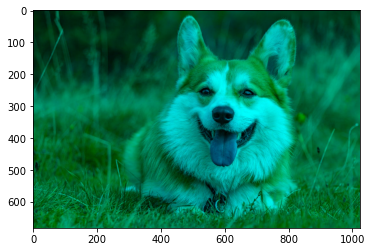

In [39]:
# 강아지 이미지의 G, B 채널만 원본 값을 갖게하고,
# R 채널은 0을 갖게 하자.
강아지_GB = 강아지_array[:,:,1:]

Array_R = np.full(
    (강아지_GB.shape[0], 강아지_GB.shape[1], 1),
    0
)

One_Channel_img = np.concatenate(
    (Array_R, 강아지_GB),
     axis=2
)

# 시각화
plt.imshow(One_Channel_img)

# 이미지의 크기를 조정해보자.

(300, 200)


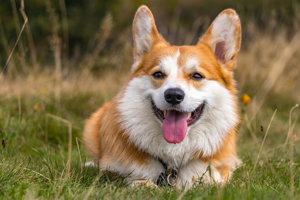

In [40]:
#“강아지사진.jpg”은 1024 x 682 해상도의 이미지다.
# 이를 300 x 200으로 조정해보자.

New_width = 300
New_height = 200

Resize_강아지 = 강아지.resize((New_width, New_height))
print(Resize_강아지.size)
Resize_강아지

(400, 600)


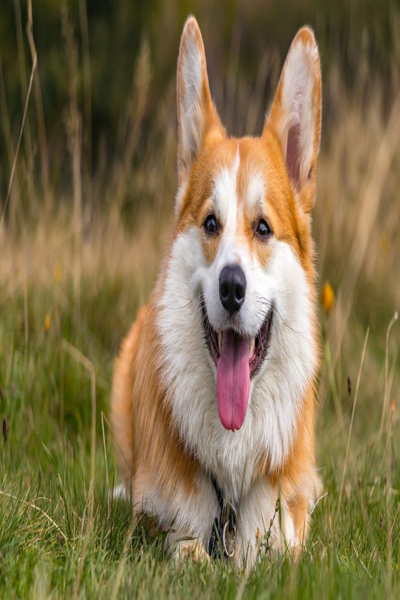

In [41]:
#“강아지사진.jpg”은 1024 x 682 해상도의 이미지다.
# 이를 400 x 600으로 조정해보자.

New_width = 400
New_height = 600

Resize_강아지 = 강아지.resize((New_width, New_height))
print(Resize_강아지.size)
Resize_강아지

## 이미지 잘라내기

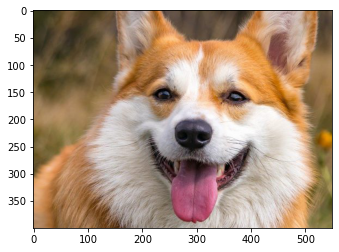

In [42]:
Crop_IMG = 강아지_array[100:500, 300:850, :]

plt.imshow(Crop_IMG)

## 이미지를 Zero padding 해보자.

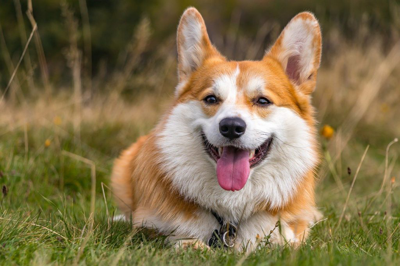

In [43]:
#“강아지사진.jpg”은 1024 x 682 해상도의 이미지다.
# 가로, 세로 길이를 400 x 400으로 하는 정방행렬을 만들어보자.
# 본 이미지는 가로 길이가 1024로 더 기므로, 이를 400으로 축소시키고,
# 세로 길이는 이에 비례하여 축소시켜보자.

New_width = 400

# 강아지 이미지의 형태
img_shape = 강아지.size

# 가로 길이를 400으로 만들기 위해 곱한 비율
width_ratio = New_width/img_shape[0]

# 가로 길이를 400으로 이미지를 축소함.
Resized_IMG = 강아지.resize((New_width, int(img_shape[1] * width_ratio)))

Resized_IMG

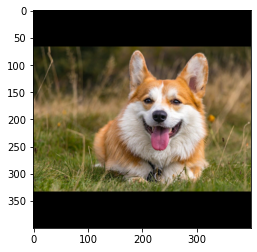

In [44]:
width_size, height_size = Resized_IMG.size

# 이미지의 목표 크기 설정
## 가로, 세로 길이 중 큰 것을 목표 크기로 설정한다.
target_size = width_size if width_size > height_size else height_size

# Padding할 크기
width_pad_size = target_size - width_size
height_pad_size = target_size - height_size

x_pad1 = int(np.ceil(height_pad_size/2))
x_pad2 = height_pad_size - x_pad1
y_pad1 = int(np.ceil(width_pad_size/2))
y_pad2 = width_pad_size - y_pad1

# 이미지에 padding 실시
Zero_Padding_IMG = np.pad(
    Resized_IMG,
    ((x_pad1,x_pad2),(y_pad1,y_pad2),(0,0)),
    mode = 'constant',
    constant_values=0
)

plt.imshow(Zero_Padding_IMG)
plt.show()

# MRI DICOM 이미지를 읽어보자

In [45]:
# # pydicom을 설치해주자.
# !pip install pydicom

In [46]:
import pydicom

In [47]:
# Dicom 객체를 가지고 온다.
Raw_Dicom = pydicom.dcmread("MRI_sample.dcm")

# Dicom 객체로부터 Pixel 정보를 가지고 온다.
MRI_array = Raw_Dicom.pixel_array

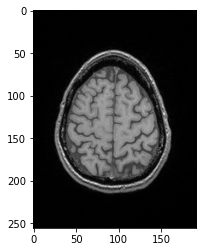

In [48]:
# MRI 이미지를 시각화해보자.
## MRI 이미지는 1차원 흑백 이미지이므로, cmap="gray"로 설정하자.
plt.imshow(MRI_array, cmap="gray")

## MRI 이미지의 기초통계량

In [49]:
print(f"MRI 이미지의 형태: {MRI_array.shape}")
print(f"MRI Pixel의 최솟값: {MRI_array.min()}")
print(f"MRI Pixel의 최댓값: {MRI_array.max()}")

MRI 이미지의 형태: (256, 192)
MRI Pixel의 최솟값: 0
MRI Pixel의 최댓값: 383


## MRI 이미지의 표준화

In [50]:
# modality LUT 적용
# Apply rescale operation (if required, otherwise returns arr unchanged)
Modality_LUT = pydicom.pixel_data_handlers.util.apply_modality_lut(MRI_array, Raw_Dicom)

# VOI LUT 적용
# Apply windowing operation (if required, otherwise returns arr unchanged)
VOI_LUT = pydicom.pixel_data_handlers.util.apply_voi_lut(Modality_LUT, Raw_Dicom, index=0)

## LUT 별 기초통계량

In [51]:
print("1) 원본 MRI 이미지")
print("----"*20)
print(f"Pixel의 최솟값: {MRI_array.min()}")
print(f"Pixel의 최댓값: {MRI_array.max()}")
print(f"Pixel의 평균: {MRI_array.mean().round(3)}")
print(f"Pixel의 표준편차: {MRI_array.std().round(3)}")

print("\n")

print("2) Modality LUT")
print("----"*20)
print(f"Pixel의 최솟값: {Modality_LUT.min()}")
print(f"Pixel의 최댓값: {Modality_LUT.max()}")
print(f"Pixel의 평균: {Modality_LUT.mean().round(3)}")
print(f"Pixel의 표준편차: {Modality_LUT.std().round(3)}")

print("\n")

print("3) VOI LUT")
print("----"*20)
print(f"Pixel의 최솟값: {VOI_LUT.min()}")
print(f"Pixel의 최댓값: {VOI_LUT.max()}")
print(f"Pixel의 평균: {VOI_LUT.mean().round(3)}")
print(f"Pixel의 표준편차: {VOI_LUT.std().round(3)}")

1) 원본 MRI 이미지
--------------------------------------------------------------------------------
Pixel의 최솟값: 0
Pixel의 최댓값: 383
Pixel의 평균: 56.032
Pixel의 표준편차: 83.096


2) Modality LUT
--------------------------------------------------------------------------------
Pixel의 최솟값: 0
Pixel의 최댓값: 383
Pixel의 평균: 56.032
Pixel의 표준편차: 83.096


3) VOI LUT
--------------------------------------------------------------------------------
Pixel의 최솟값: 0.0
Pixel의 최댓값: 4095.0
Pixel의 평균: 181.995
Pixel의 표준편차: 444.321


<br>
<br>
<br>
<br>

# 이미지 데이터와 딥러닝 모델(CNN)

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Deep Learning에 사용할 Library
import tensorflow as tf
from tensorflow import keras

## 데이터를 가지고 온다.

In [53]:
# 학습에 사용할 데이터를 가지고 온다.
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

## 데이터의 기초통계량을 보자.

In [54]:
# Train Dataset의 형태
train_images.shape

(60000, 28, 28)

In [55]:
# Train Label의 Class와 Class별 빈도
np.unique(train_labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
       dtype=int64))

## 이미지 데이터를 시각화해보자.

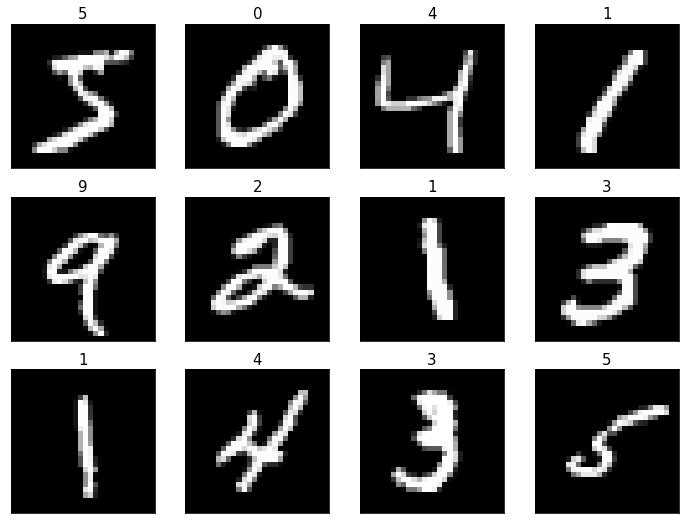

In [56]:
plt.figure(figsize=(12, 9))

for i, img in enumerate(train_images[:12]):
    
    title = train_labels[i]
    i += 1
    
    plt.subplot(3, 4, i)
    plt.imshow(img, cmap="gray")
    plt.title(title, fontsize=15, pad=5)

    # 축의 눈금 라벨 제거
    plt.gca().axes.xaxis.set_visible(False)
    plt.gca().axes.yaxis.set_visible(False)

## Array의 모습

In [57]:
for i in train_images[0]:
    
    i = i.astype("str")
    i = ', '.join(i.tolist())
    print(i)

0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 18, 18, 18, 126, 136, 175, 26, 166, 255, 247, 127, 0, 0, 0, 0
0, 0, 0, 0, 0, 0, 0, 0, 30, 36, 94, 154, 170, 253, 253, 253, 253, 253, 225, 172, 253, 242, 195, 64, 0, 0, 0, 0
0, 0, 0, 0, 0, 0, 0, 49, 238, 253, 253, 253, 253, 253, 253, 253, 253, 251, 93, 82, 82, 56, 39, 0, 0, 0, 0, 0
0, 0, 0, 0, 0, 0, 0, 18, 219, 253, 253, 253, 253, 253, 198, 182, 247, 241, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
0, 0, 0, 0, 0, 0, 0, 0, 80, 156, 107, 253, 253, 205, 11, 0, 43, 154, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 1, 154, 253, 90, 0, 0, 0, 0, 0,

## Feature Scaling

In [58]:
# 이미지 데이터는 최소값 0, 최댓값 255를 갖으므로
## 이에 맞춰 Min-max scaling 해줌.
train_images = train_images/255
test_images = test_images/255

## Validation set 생성

In [59]:
# Train Dataset에서 Validation Dataset 추출
validation_ratio = 0.1
valid_num = int(np.round(len(train_images) * validation_ratio))

valid_images = train_images[:valid_num]
train_images = train_images[valid_num:]
valid_labels = train_labels[:valid_num]
train_labels = train_labels[valid_num:]

## 흑백 이미지이므로, Channel 1개 추가

In [60]:
# 흑백 이미지이므로 1개의 Channel 추가
train_images = np.expand_dims(train_images, axis=3)
valid_images = np.expand_dims(valid_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

print("Dataset의 형태")
print("----"*20)
print(f"Train: {train_images.shape}")
print(f"Validation: {valid_images.shape}")
print(f"Test: {test_images.shape}")

Dataset의 형태
--------------------------------------------------------------------------------
Train: (54000, 28, 28, 1)
Validation: (6000, 28, 28, 1)
Test: (10000, 28, 28, 1)


## Deep Learning 모델을 만들어보자.

In [61]:
model = keras.models.Sequential()
model.add(
    keras.layers.Conv2D(
        filters=32,
        kernel_size=(3, 3),
        strides=(1,1),
        activation="relu",
        padding="same",
        input_shape=(28, 28, 1)
    )
)
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, 3, activation="relu"))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, 3, activation="relu"))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

## 모델 요약

In [62]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

## 모델 컴파일

In [63]:
# 모델 컴파일
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(
    optimizer=opt,
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

## 조기종료 콜백 함수 정의

In [64]:
# 조기종료 콜백 함수 정의
early_stop = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=10,
    restore_best_weights=True
)

## 모델 학습

In [65]:
# 모델 학습
model.fit(
    train_images,
    train_labels,
    epochs=100,
    batch_size=32,
    validation_data=(valid_images, valid_labels),
    callbacks=[early_stop],
    shuffle=True
)

Epoch 1/100
1688/1688 [==============================] - 26s 10ms/step - loss: 0.8439 - accuracy: 0.7473 - val_loss: 0.1508 - val_accuracy: 0.9568
Epoch 2/100
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1328 - accuracy: 0.9610 - val_loss: 0.0840 - val_accuracy: 0.9760
Epoch 3/100
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0837 - accuracy: 0.9747 - val_loss: 0.0799 - val_accuracy: 0.9768
Epoch 4/100
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0668 - accuracy: 0.9791 - val_loss: 0.0578 - val_accuracy: 0.9823
Epoch 5/100
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0519 - accuracy: 0.9843 - val_loss: 0.0519 - val_accuracy: 0.9847
Epoch 6/100
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0426 - accuracy: 0.9867 - val_loss: 0.0449 - val_accuracy: 0.9848
Epoch 7/100
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0400 - accuracy: 0.9876 - val_loss: 0.0425 - val_

## 모델 성능 평가

In [66]:
Predict_Result = np.argmax(model.predict(test_images), axis=1)
Predict_Result

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [67]:
Accuracy = sum(Predict_Result == test_labels) / len(test_labels)
print(f"Deep Learning 모델의 정확도: {np.round(Accuracy*100, 2)} %")

Deep Learning 모델의 정확도: 99.13 %
